In [197]:
from shapely.geometry import LinearRing, Point, Polygon
import numpy as np

In [198]:
p = [[(0.0, 0.0), (0.0, 10.0), (10.0, 10.0), (10.0, 0.0)],
     [(3.0,3.0), (6.0, 3.0), (6.0, 6.0), (3.0, 6.0)]]


In [199]:
class Window(Polygon):
    def __init__(self, exterior, interiors=[]):
        if interiors:
            super(Window, self).__init__(exterior, interiors)
        else:
            super(Window, self).__init__(exterior)


        

In [200]:
w = Window(p[0], [p[1]])

In [201]:
w.bounds

(0.0, 0.0, 10.0, 10.0)

In [202]:
wh = Window(p[0])

In [203]:
wh.bounds

(0.0, 0.0, 10.0, 10.0)

In [204]:
wh.contains(Point(3.1, 3.1))

True

In [205]:
w.contains(Point(3.1, 3.1))

False

In [206]:
wh.area

100.0

In [207]:
w.area

91.0

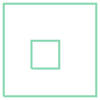

In [208]:
w.boundary

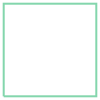

In [209]:
wh.boundary

In [210]:
class Window(Polygon):
    def __init__(self, exterior, interiors=[]):
        if interiors:
            super(Window, self).__init__(exterior, interiors)
        else:
            super(Window, self).__init__(exterior)


    def rpoints(self, n):
        """
        Generate n random points in window
        """
        l, b, r, t = self.bounds
        count = 0
        realization = []
        while count < n:
            xs = np.random.uniform(l, r, (n,1))
            ys = np.random.uniform(b, t, (n,1))
            pnts = [Point(x,y) for x,y in zip(xs, ys)]
            pins = [pnt for pnt in pnts if self.contains(pnt)]
            realization.extend(pins)
            count = len(realization)
        return np.array([np.asarray(p) for p in realization[:n]])
        

In [211]:
wh = Window(p[0], [p[1]])

In [212]:
rh = wh.rpoints(1000)

In [213]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


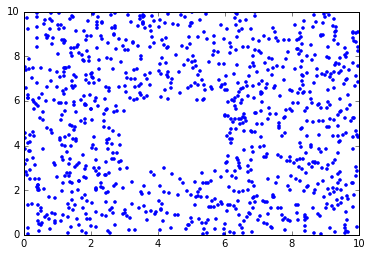

In [214]:
plot(rh[:,0], rh[:,1], ".")

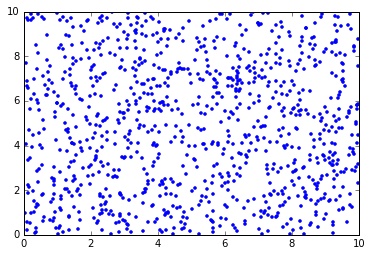

In [215]:
w = Window(p[0])
r = w.rpoints(1000)
plot(r[:,0], r[:,1], ".")

In [216]:
rh

array([[ 6.31873833,  8.30139411],
       [ 9.93133145,  7.09488823],
       [ 6.8355998 ,  6.64428715],
       ..., 
       [ 3.32051392,  6.99299582],
       [ 0.40736921,  2.21662114],
       [ 7.94248247,  5.61680172]])

In [217]:
[(x,y) for x,y in rh if not wh.contains(Point(x,y))]

[]